<a href="https://colab.research.google.com/github/Pilo1961/Deep_Learning/blob/master/proyecto_final/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
#esto se debe de ir al modulo util
def add_fileName(df):
  '''
    Add filename column to the ID-description list
  '''
  df['filename']='a'
  for index, row in df.iterrows():
      try:
        new_name = row['ID'][:-6] + '_' + row['ID'][-1] + '.jpg'
        row['filename']=new_name
      except:
        found_n.append(row['ID'])

  return df


Primero hay que poner como construimos el mbedding chafa


In [0]:
# Libraries required
from textblob import TextBlob
import matplotlib.pyplot as  plt
import nltk
import seaborn as sns
nltk.download('punkt')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# Load data
df = pd.read_csv("/content/drive/My Drive/Flickr8k.token.txt", sep='\t', names=['ID', 'Text'], index_col=False)
df=add_fileName(df)
print(df.shape)

# Remove entries with nan values
df.dropna(inplace=True)
df.isnull().values.any()
df.head()

#Quito los registros de una imagen que falta
df.drop([6730,6731,6732,6733,6734],inplace=True)
df.reset_index()
df.shape

(40460, 3)


(40455, 3)

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

# Imprime el set
print(STOPWORDS)

# Aux funcción para substituir abreciacioes
import re
def decontracted(phrase):
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

  # Set adicional de stopwords, removeremos palabras tanto de este set como del que
# viene definido en el nltk
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'having', 'themselves', 'they', 'until', "haven't", "mightn't", 'don', 'in', 'we', 'down', 've', 'ma', 'or', 'now', 'by', 'did', "needn't", 'then', 'ours', 'for', 'myself', 'further', 'which', 'both', 'been', 'after', 'nor', 'him', 'had', 'them', 'this', 'should', 're', 'haven', 'with', 'during', "you've", 'y', 'and', 'himself', 'each', 'same', "it's", 'why', 's', 'aren', 'o', 'who', 'have', 'he', "should've", 'd', 'how', 'above', "you'll", 'just', 'too', 'into', 'through', 'their', 'while', "hadn't", 'can', 'out', 'wouldn', "you're", 'here', 'yourself', 'before', "don't", 'most', 'all', 'needn', 'ourselves', 'were', 'me', "couldn't", 'will', 'up', 'itself', 'his', 'no', 'has', 'once', 'hadn', 'when', 'own', "mustn't", 'over', 'be', 'there', 'it', 'yourselves', "hasn't", 'any', "won't", 'herself', 'because', 'than', 'being', 'are', "isn't", 'shan', 'theirs', 'whom', '

In [0]:
# Función auxiliar para remover stopwords y otras normalizaciones de texto
# (Aqui puedes incluir el lematizador o stemming si gustas explorarlos)
def remove_stopwords(dataframe):
  SYNS = []
  for sentance in dataframe:
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in STOPWORDS)
    SYNS.append(sentance.strip())
  return SYNS

In [0]:
print(df["Text"][1:5])
contextos=remove_stopwords(df["Text"])

1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: Text, dtype: object


In [0]:
print(len(contextos))
len(df["Text"])

40455


40455

In [0]:

# Numero de oraciones por contexto
num_sent=[]
for i in range(len(contextos)):
  num_sent=np.append(num_sent, len(TextBlob(contextos[i]).sentences))

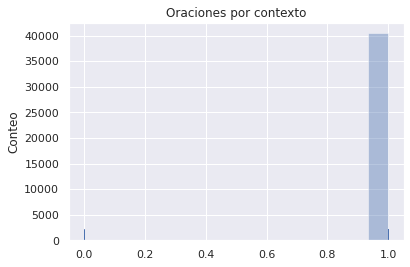

In [0]:
sns.set(style="darkgrid")
g = sns.distplot(num_sent, kde=False, rug =True, color="b", bins=15)
g.set_title("Oraciones por contexto")
g.set_ylabel('Conteo')
plt.show()

In [0]:
#Todos son de 1 sola oracion
print(np.quantile(num_sent,.99))
pd.DataFrame(num_sent).describe()

1.0


,0
count,40455.000000
mean,0.999951
std,0.007031
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [0]:
#Numero de palabras en todos los contextos
corpus= TextBlob(" ".join(contextos)).words
len(corpus)

251805

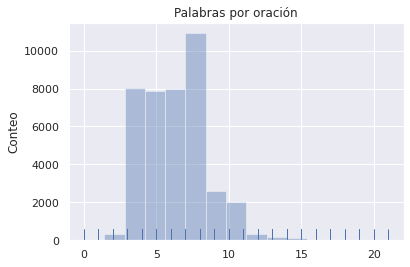

max=  21
min=  0


In [0]:

#palabras por oracion
word_sent=[len(TextBlob(sentence).words) for sentence in contextos]


sns.set(style="darkgrid")
g = sns.distplot(word_sent, kde=False, rug =True, color="b", bins=15)
g.set_title("Palabras por oración")
g.set_ylabel('Conteo')
plt.show()


print("max= ",max(word_sent))
print("min= ",min(word_sent))

In [0]:
contextos[900]

'two children laughing grass'

In [0]:
print(np.quantile(word_sent,.96))
pd.DataFrame(word_sent).describe()

10.0


,0
count,40455.000000
mean,6.224323
std,2.083165
min,0.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,21.000000


In [0]:
import torch
import cython
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [0]:

#Hace el corpus
data=[]
i=0
for cont in contextos: # para cada contexto
  sample=cont
  for sent in sent_tokenize(sample): # Extrae las oraciones
    temp=[]
    for j in word_tokenize(sent): #Extrae las palabras
      temp.append(j.lower())

    data.append(temp)

In [0]:
# La estructura que queda de data tiene la forma de lista de oraciones.
# Cada oracion es una lista de palabras
# Con este metodo tenemos 93576 oraciones, anteriormente teniamos 92659
# Tiene un 0.1% de variacion
print(len(data))
data[1]

40453


['girl', 'going', 'wooden', 'building']

In [0]:
# Entrena un modelo Word2Vec CBOW con nuestro corpus
model1 = gensim.models.Word2Vec(data, min_count = 1,  size = 100, window = 5,workers=8)

In [0]:
# Longitud del vocabulario
len(model1.wv.vocab)

8322

In [0]:
# La representaciones las podemos ver:
model1['girl']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.07247873, -0.41407046,  1.5334915 , -1.1876758 , -0.06591301,
        0.802107  , -0.6205854 ,  0.70208305, -0.13732287,  0.6276151 ,
       -0.5920715 ,  0.5342545 , -0.37674958,  0.20838134,  0.7606562 ,
       -0.51744944, -0.15870005, -0.16328898,  0.01969972,  1.3993155 ,
        0.28505453,  0.47587407,  1.0312358 , -0.09777164,  0.14397086,
       -0.49190688,  0.09751461, -0.133599  , -0.8711931 ,  0.03306094,
        0.1003688 , -0.12767963,  0.70238966,  0.07547157, -0.01485913,
       -1.817775  ,  0.39401004,  0.31994838,  0.0574664 , -0.1537738 ,
       -0.9381442 , -0.2811696 ,  0.38871413,  0.72386104, -0.71758866,
       -0.73285705,  1.7309679 , -0.23833697, -0.5050395 , -0.7893795 ,
        0.63449967,  0.12705526,  0.37287074,  0.70048094,  0.70142245,
        0.10840399, -1.0148753 , -0.8986158 ,  1.0645579 , -0.21242979,
       -0.81210065,  0.740452  , -1.2958746 ,  0.27263978, -0.09831876,
       -0.28157204, -0.04100332, -0.11305153, -0.08484934, -0.15

In [0]:

# Buscamos palabras similares a otras
# Una pregunta es:
print("La pregunta 1 es: ")
print(df["Text"][1])
print("Palabras similares a girl: ")
print(model1.wv.most_similar(positive=['girl'], topn=5))

La pregunta 1 es: 
A girl going into a wooden building .
Palabras similares a girl: 
[('child', 0.9655029773712158), ('boy', 0.9606728553771973), ('kid', 0.8886665105819702), ('suit', 0.8661897778511047), ('toddler', 0.8651593923568726)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# Entrena un modelo Word2Vec skip-gram con nuestro corpus
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1, workers=8)

In [0]:
# Buscamos palabras similares a otras
# Una pregunta es:
print("La pregunta 1 es: ")
print(df["Text"][1])
print("Palabras similares a girl: ")
print(model2.wv.most_similar(positive=['girl'], topn=5))

La pregunta 1 es: 
A girl going into a wooden building .
Palabras similares a girl: 
[('toddler', 0.8492792844772339), ('boy', 0.8377078175544739), ('flowered', 0.8166711330413818), ('blowing', 0.8131659626960754), ('swimsuit', 0.8092123866081238)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
#vamos a hacer unba compresion con una red lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv2D


In [0]:
# Crea una red con layers Embedding, LSTM, Dense
model = Sequential()
model.add(LSTM(units=1024, input_shape=(2,100), return_sequences=False))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1024)              4608000   
Total params: 4,608,000
Trainable params: 4,608,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
#datos de entrada
t=3
temp=[]
embedding=[]
for i in range(len(contextos)):
  temp=[]
  for j, word in enumerate(TextBlob(contextos[i]).words):
    temp=np.append(temp,model1[word])
    if j==9: break
  temp=np.append(temp,np.zeros(1024-len(temp)))
  embedding.append(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
embedding=np.array(embedding)
embedding.shape

(40455, 1024)

In [0]:
# Dump model1 in a pickle
import pickle
with open("/content/drive/My Drive/embeddings_jp/word2vec_append.pkl", 'wb') as handle:
    pickle.dump(embedding, handle)

In [0]:
# Dump model2 in a pickle
with open("/content/drive/My Drive/embeddings_jp/word2vec_skipgram.pkl", 'wb') as handle:
    pickle.dump(model2, handle)

Hacer el embedding Word2Vec


Hacer infersent

In [0]:
import numpy as np
import pandas as pd
import json
from random import randint
import torch
import pickle

%load_ext autoreload
%autoreload 2

In [0]:
# Usa cuda si está disponible
cuda=torch.cuda.is_available()
use_cuda = cuda
print("Use cuda: ",cuda)

Use cuda:  True


In [0]:
# Importa el modulo models de infersent
import sys
sys.path.append('/content/drive/My Drive/QA/')
from models import InferSent

model_version = 1
MODEL_PATH = "/content/drive/My Drive/QA/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

# Keep it on CPU or put it on GPU
model = model.cuda() if use_cuda else model

In [0]:
# Importa el embedding word2Vec GLovE preentrnado
W2V_PATH = '/content/drive/My Drive/QA/glove.840B.300d.txt' if model_version == 1 else 'fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [0]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# Tokeniza datos test
# Hace cada oracion un token
# Convierte todo el texto a minusculas
contextos=df['Text']
data=[]
for cont in contextos: # para cada contexto
  sample=cont
  for sent in sent_tokenize(sample): #Extrae las oraciones
    data.append(sent.lower())

In [0]:
# Hay 93576 oraciones en el train, cada una es un token en la lista data
print(len(data))
data[:5]

40474


['a child in a pink dress is climbing up a set of stairs in an entry way .',
 'a girl going into a wooden building .',
 'a little girl climbing into a wooden playhouse .',
 'a little girl climbing the stairs to her playhouse .',
 'a little girl in a pink dress going into a wooden cabin .']

In [0]:

# Tokeniza datos train
# Hace cada oracion un token
# Convierte todo el texto a minusculas
contextos=df['Text']
data2=[]
for cont in contextos: # para cada contexto
  sample=cont
  for j,sent in enumerate(sent_tokenize(sample)): #Extrae las oraciones
    data2.append(sent.lower())

40455

In [0]:
# Hay 10458 oraciones en el test, cada una es un token en la lista data
print(len(data2))
data2[:5]

40474


['a child in a pink dress is climbing up a set of stairs in an entry way .',
 'a girl going into a wooden building .',
 'a little girl climbing into a wooden playhouse .',
 'a little girl climbing the stairs to her playhouse .',
 'a little girl in a pink dress going into a wooden cabin .']

In [0]:
# Construimos el vocabulario con las palabras en las oraciones
model.build_vocab(data,tokenize=False)

Found 8526(/8920) words with w2v vectors
Vocab size : 8526


In [0]:
# Generamos el encoding
embeddings = model.encode(data, bsize=128, tokenize=True, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 556950/557627 (99.9%)
Speed : 3115.8 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 40474


In [0]:
# Dimensiones del embedding
embeddings.shape

(40474, 4096)

In [0]:
len(df["Text"])

40455

In [0]:

# Tokeniza datos train
# Hace cada oracion un token
# Convierte todo el texto a minusculas
contextos=list(df['Text'])
len(contextos)

40455

In [0]:
# Generamos el encoding
embeddings = model.encode(contextos, bsize=128, tokenize=True, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 517290/557589 (92.8%)
Speed : 3289.2 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 40455


In [0]:
# Dimensiones del embedding
print(embeddings.shape)
print(len(embeddings))

(40455, 4096)
40455


In [0]:
with open("/content/drive/My Drive/QA/infersent.pkl", 'wb') as handle:
    pickle.dump(embeddings, handle)